# <font color='blue' style='font-size: 30px;'>Bibliotecas</font>
<hr style='border: 2px solid blue;'>


In [124]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

# <font color='blue' style='font-size: 30px;'>Dataset</font>
<hr style='border: 2px solid blue;'>

In [5]:
df = pd.read_csv('../Dados/Consumo_cerveja.csv', sep =';')

In [6]:
df.shape[0]

365

# <font color='blue' style='font-size: 30px;'>Vizualização</font>
<hr style='border: 2px solid blue;'>

In [7]:
df.head(5)

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


# <font color='blue' style='font-size: 30px;'>Matriz de Correlação</font>
<hr style='border: 2px solid blue;'>

In [20]:
df.corr().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.00,0.86,0.92,0.02,-0.05,0.57
temp_min,0.86,1.00,0.67,0.10,-0.06,0.39
temp_max,0.92,0.67,1.00,-0.05,-0.04,0.64
chuva,0.02,0.10,-0.05,1.00,0.00,-0.19
fds,-0.05,-0.06,-0.04,0.00,1.00,0.51
consumo,0.57,0.39,0.64,-0.19,0.51,1.00


Vemos uma correlação interessante sobre o dia da semana onde o FDS, o cunsumo é maior, e tambem percebemos que em temperaturas mais altas o consumo é mais elevado.

# <font color='blue' style='font-size: 30px;'>Análises Gráficas</font>
<hr style='border: 2px solid blue;'>

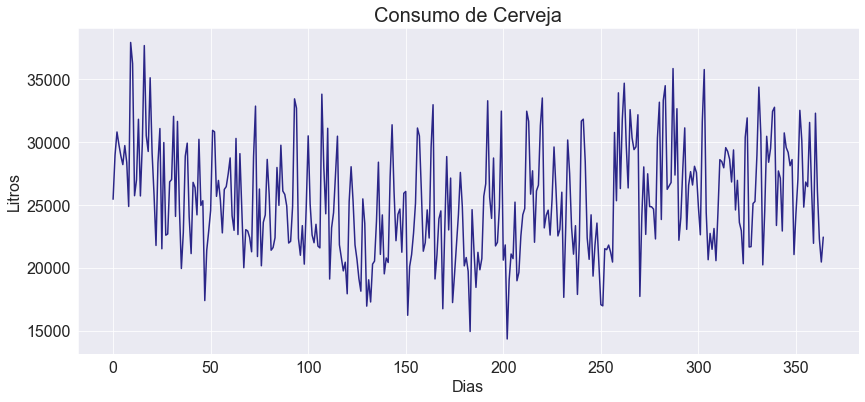

In [125]:
fig, ax = plt.subplots(figsize=(14,6))
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = df['consumo'].plot(fontsize=16)

# <font color='blue' style='font-size: 30px;'>Variável dependente (y)</font>
<hr style='border: 2px solid blue;'>

<AxesSubplot:title={'center':'Consumo de Cerveja'}, ylabel='Litros'>

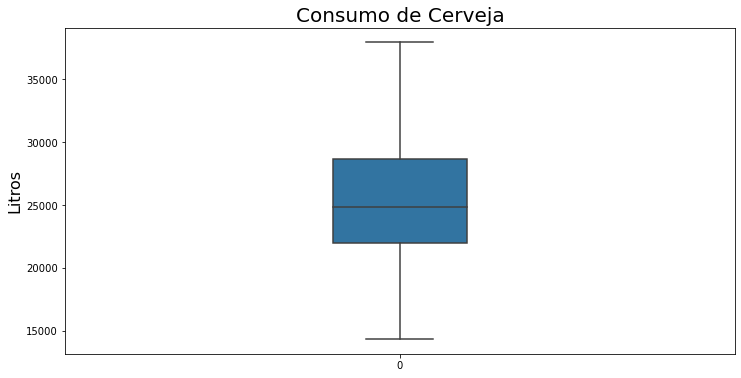

In [35]:
ax = sns.boxplot(data=df['consumo'],orient = 'v', width=0.2, )
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax


## Final de Semana influência no consumo?


<AxesSubplot:title={'center':'Consumo de Cerveja'}, xlabel='fds', ylabel='Final de Semana'>

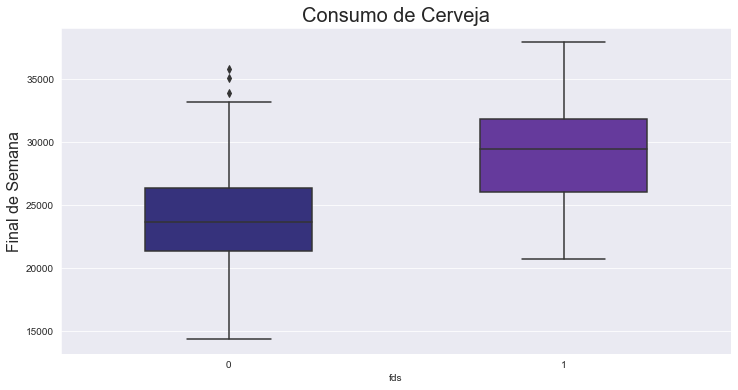

In [45]:
sns.set_palette("CMRmap")
sns.set_style('darkgrid')

ax = sns.boxplot(y='consumo', x='fds', data =  df, orient = 'v', width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Final de Semana', fontsize=16)
ax

Podemos observar que além do consumo ser maior no Final de Semana, a média de consumo também é maior

# <font color='blue' style='font-size: 30px;'>Distribuição de Frequências</font>
<hr style='border: 2px solid blue;'>

<AxesSubplot:title={'center':'Distribuição de Frequências'}, xlabel='consumo', ylabel='Consumo de cerveja (Litros)'>

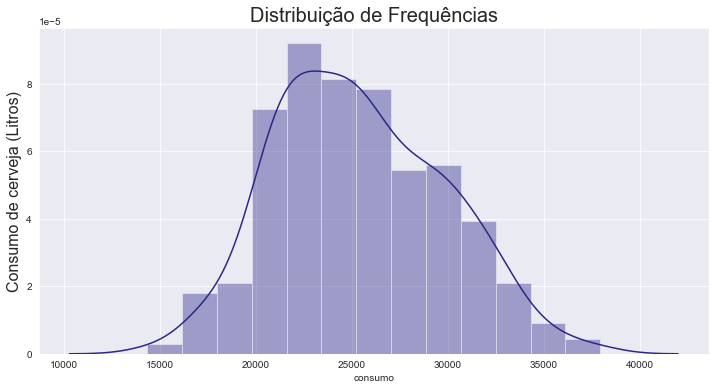

In [96]:
ax = sns.distplot(df['consumo'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Consumo de cerveja (Litros)', fontsize=16)
ax

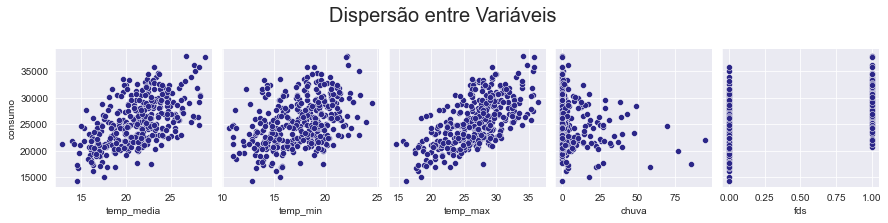

In [93]:
lista = list(df.columns)
lista.remove('consumo')
lista.remove('data')
ax = sns.pairplot(df, y_vars='consumo', x_vars=lista)
ax.fig.suptitle('Dispersão entre Variáveis', fontsize=20, y=1.20)
ax

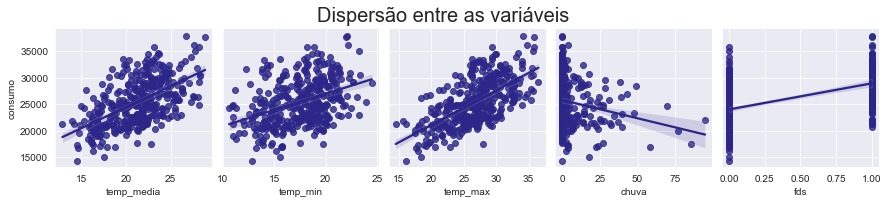

In [168]:
ax = sns.pairplot(df,y_vars='consumo', x_vars=lista, kind = 'reg' )
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=20, y=1.09)
ax

seaborn.joinplot

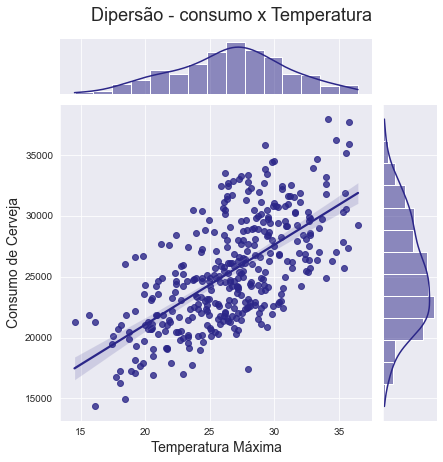

In [113]:
ax = sns.jointplot(x="temp_max",y="consumo",data=df, kind='reg')
ax.fig.suptitle('Dipersão - consumo x Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máxima","Consumo de Cerveja", fontsize= 14)
ax

# Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas

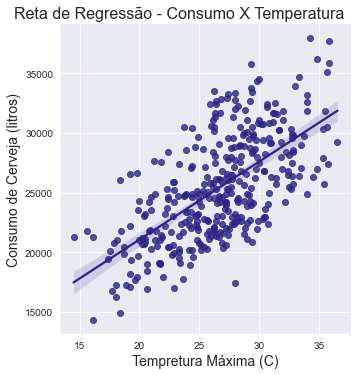

In [118]:
ax = sns.lmplot(x="temp_max", y="consumo", data=df)
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura ', fontsize=16, y=1.02)
ax.set_xlabels("Tempretura Máxima (C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax

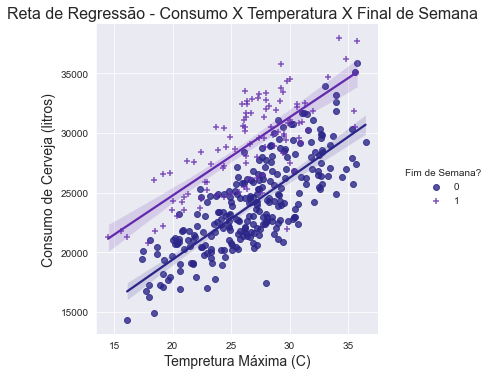

In [122]:
ax = sns.lmplot(x="temp_max", y="consumo", data=df, hue="fds", markers=['o', '+'], legend=False)
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura X Final de Semana ', fontsize=16, y=1.02)
ax.set_xlabels("Tempretura Máxima (C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax.add_legend(title="Fim de Semana?")
ax

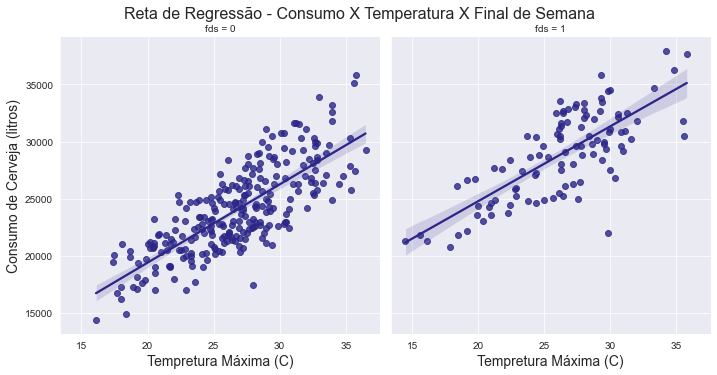

In [123]:
ax = sns.lmplot(x="temp_max", y="consumo", data=df, col ="fds" )
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura X Final de Semana ', fontsize=16, y=1.02)
ax.set_xlabels("Tempretura Máxima (C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax

# <font color='blue' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para o Consumo</font>
<hr style='border: 2px solid blue;'>

Criando uma Seria (pandas) para armazenar o Consumo de Cerveja (y)

In [129]:
y = df['consumo']

Criando uma Seria (pandas) para armazenar as variáveis explicativas (x)

In [130]:
x = df[['temp_max', 'chuva', 'fds']]

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=2811)

Verificando os tamanhos dos arquivos gerados pela função train_test_split

In [152]:
x_train.shape

(255, 3)

In [139]:
x_test.shape

(110, 3)

In [142]:
x_train.shape[0] + x_test.shape[0]

365

In [144]:
x.shape[0] * 0.30

109.5

# <font color='blue' style='font-size: 30px;'>Linear Regression</font>
<hr style='border: 2px solid blue;'>

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Instanciando a classi LineaRegression()

In [161]:
modelo = LinearRegression()

In [162]:
modelo.fit(x_train, y_train)

LinearRegression()

In [163]:
print('R² = {}'.format(modelo.score(x_train, y_train).round(2)))

R² = 0.73


# Gerando previsões para os dados com TEST (x_teste) utilizando método predicit() do objeto "modelo" 

In [164]:
y_previsto = modelo.predict(x_test)

# Obtendo o coeficente de  determinação (R²) para as previsões do nosso modelo

In [167]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.69


# <font color='blue' style='font-size: 30px;'> Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid blue;'>

# Dados de entrada

In [173]:
entrada = x_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


# Gerando Previsão

In [185]:
print('Para esse dia a Previsão de venda é de  = %s litros de Cerveja' % modelo.predict(entrada)[0].round(2))

Para esse dia a Previsão de venda é de  = 26094.9 litros de Cerveja


# Criando um Simulador Simples

In [187]:
temp_max =40
chuva = 0
fds = 1
entrada=[[temp_max,chuva,fds]]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

38742.53 litros


# <font color='blue' style='font-size: 30px;'> Interpretacão dos Coeficente Estimados</font>
<hr style='border: 2px solid blue;'>

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.</p>

In [189]:
modelo.intercept_ # seria o consumo médio independete de qualquer variável

5951.9763393124485

In [191]:
type(modelo.intercept_)

numpy.float64

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.</p>

In [193]:
modelo.coef_.round(2)

array([ 684.74,  -60.78, 5401.08])

In [194]:
type(modelo.coef_)

numpy.ndarray

# Confirmando a ordem das variáveis explicativas no DataFrame

In [195]:
x.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

# Criando uma lista com o nomes da variáveis do modelo

In [196]:
index = ['Intercepto', 'Temperatura Máxima', 'Chuva (mm). ', 'Final de semana']

# Criando um DataFrame para armazenar os coeficientes do modelo

In [199]:
pd.DataFrame(data=np.append(modelo.intercept_,modelo.coef_),index=index, columns = ['Parâmetros'])

,Parâmetros
Intercepto,5951.976339
Temperatura Máxima,684.736759
Chuva (mm).,-60.782435
Final de semana,5401.083339


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros</b>.
</p>

# <font color='blue' style='font-size: 30px;'> Análise Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid blue;'>

# Gerando as previsões do modelo para os dados de TREINO

In [202]:
y_previsto_train = modelo.predict(x_train)

# Gráfico de dispersão entre valor estimado e valor real

<AxesSubplot:title={'center':'Previsão x Real'}, xlabel='Consumo de Cerveja em (Litros) - Previsão', ylabel='Consumo de Cerveja em (Litros) - Real'>

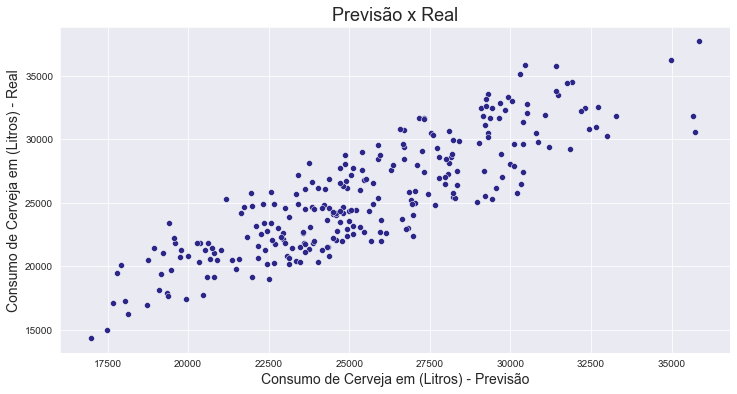

In [204]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão x Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja em (Litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja em (Litros) - Real', fontsize=14)
ax

# Obtendo resíduos

In [205]:
residuo = y_train - y_previsto_train 

In [206]:
residuo

195    3891.289113
344    4040.499863
288   -3010.078635
59    -1704.289133
220    4223.837237
          ...     
73     3186.229912
68     -739.805532
215    3010.236465
341    2588.394409
84     1631.868243
Name: consumo, Length: 255, dtype: float64

# Gráfico de dispersão entre valor estima e resíduos
Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

<AxesSubplot:title={'center':'Resíduos x Previsão'}, xlabel='Consumo de Cerveja em (Litros) - Previsão', ylabel='Resíduos'>

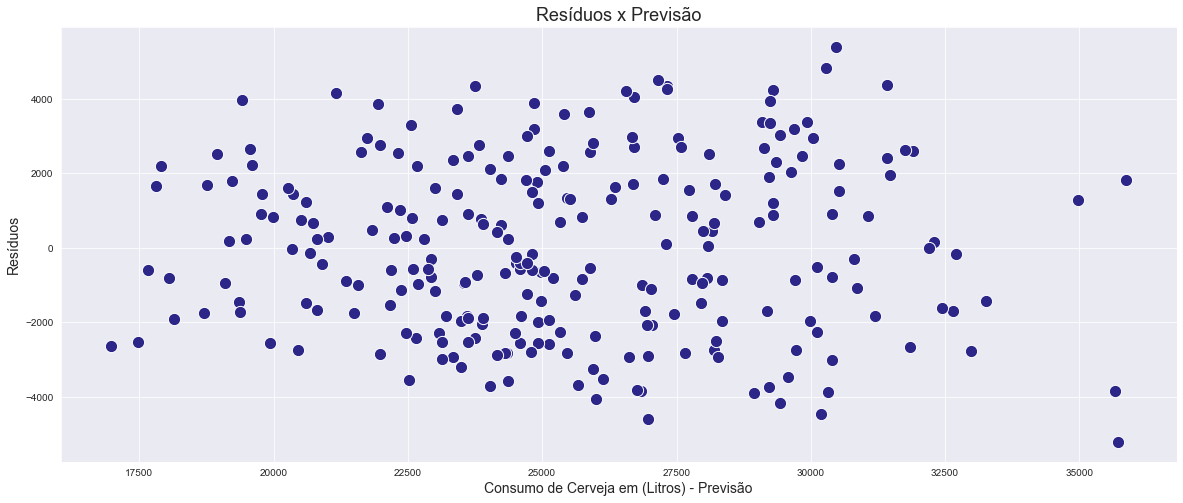

In [209]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(20,8)
ax.set_title('Resíduos x Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja em (Litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

<AxesSubplot:title={'center':'Resíduos x Previsão'}, xlabel='Consumo de Cerveja em (Litros) - Previsão', ylabel='Resíduos²'>

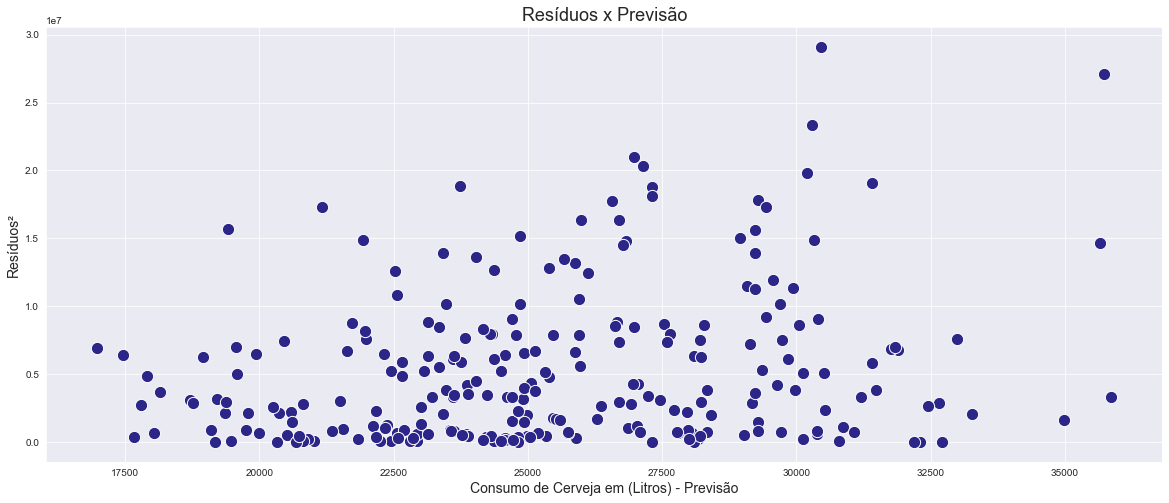

In [211]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)
ax.figure.set_size_inches(20,8)
ax.set_title('Resíduos x Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja em (Litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax

# Plotando a distribuição de frequências dos resíduos

<AxesSubplot:title={'center':'Distribuição de Frequências dos Resíduoes'}, xlabel='Litros', ylabel='Density'>

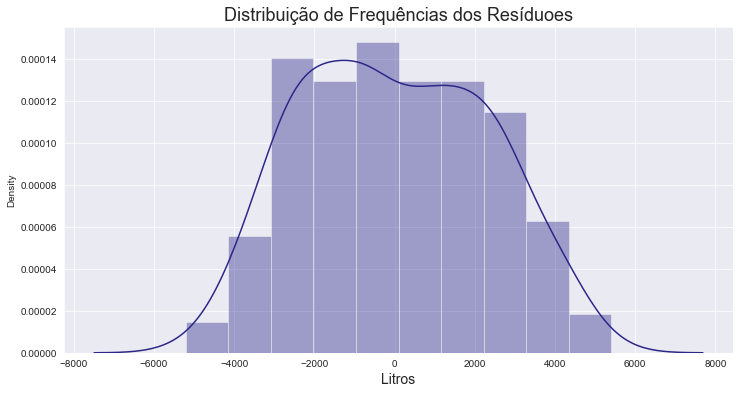

In [217]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências dos Resíduoes', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax

# <font color='blue' style='font-size: 30px;'> Comparando Modelos</font>
<hr style='border: 2px solid blue;'>

# Estimando um novo modelo com substituição da variável explicativa Temperatura Máxima pela Temperatura Média

In [226]:
x2 = df[['temp_media', 'chuva', 'fds',]]

# Criando os datasets de treino e de teste

In [227]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y,test_size=0.3, random_state=2811)

# Instanciando a classe LinearRregression()

In [228]:
modelo_2 = LinearRegression()

# Utilizando o método fit() do objeto "modelo_2" para estimar nosso modelo linear utilizando os dados de TREINO (y2_train e x2_train)

In [229]:
modelo_2.fit(x2_train, y2_train)

LinearRegression()

In [233]:
print('Modelo com Temp. Média')
print('R² = {}'.format(modelo_2.score(x2_train, y2_train).round(2)))

Modelo com Temp. Média
R² = 0.66


In [235]:
print('Modelo com Temp. Máxima')
print('R² = {}'.format(modelo.score(x_train, y_train).round(2)))

Modelo com Temp. Máxima
R² = 0.73


# Gerando previsões para os dados de TESTE (X_teste e X2_teste) utilizando o método predict() dos objetos "modelo" e "modelo2"

In [237]:
y_previsto = modelo.predict(x_test)
y_previsto_2 = modelo_2.predict(x2_test)

In [239]:
print('Modelo com Temp. Média')
print('R² = {}'.format(metrics.r2_score(y2_test, y_previsto_2).round(2)))

Modelo com Temp. Média
R² = 0.66


In [240]:
print('Modelo com Temp. Máxima')
print('R² = {}'.format(metrics.r2_score(y_test, y_previsto).round(2)))

Modelo com Temp. Máxima
R² = 0.69


# Raiz do erro quadrático médio

In [244]:
EQM_2 = metrics.mean_squared_error(y2_test, y_previsto_2).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previsto_2)).round(2)
R2_2 = metrics.r2_score(y2_test, y_previsto_2).round(2)
pd.DataFrame([EQM_2,REQM_2,R2_2],['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,6060775.46
REQM,2461.86
R²,0.66


# Obtendo métricas para o modelo com temperatura Máxima

In [245]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)
pd.DataFrame([EQM,REQM,R2],['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,5471976.38
REQM,2339.23
R²,0.69


o modelo com temperatura máxima é mais efetivo pois o R² quanto maior melhor, e quanto aos erros quanto menor melhor.

# <font color='blue' style='font-size: 30px;'> Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid blue;'>

# Dados de Entrada

In [249]:
x_test[0:1]

,temp_max,chuva,fds
5,30.5,12.2,0


In [250]:
entrada = x_test[0:1]

# Gerando Previsão Pontual

In [252]:
modelo.predict(entrada)[0].round(2)

26094.9

# Gerando um simulador Simples

In [257]:
temp_max = 30.5
chuva = 12.2
fds = 0
entrada =[[temp_max,chuva,fds]]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

26094.90 litros


In [258]:
import pickle

In [259]:
output = open('modelo_consumo_cerveja', 'wb')
pickle.dump(modelo, output)
output.close()